In [2]:
!pip install seaborn

     ------------------------------------ 293.3/293.3 KB 786.2 kB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\Raheem Kolachi\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [31]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler

# Set plot style for seaborn
sns.set(style="whitegrid")

# Load the dataset from the CSV file
data = pd.read_csv('leak_data.csv')


In [32]:

# Display the first few rows of the dataset
print(data.head())





   Flow Rate (GPM)   Pressure Leak Severity Has Leakage
0        43.106521  74.538537         Large         Yes
1        17.543772  25.672926         Minor          No
2        12.049415  31.615049         Minor          No
3        24.385954  63.655447      Moderate         Yes
4        49.108196  14.795496         Large         Yes


In [33]:
# Display a summary of the dataset
print(data.describe())



       Flow Rate (GPM)     Pressure
count      1000.000000  1000.000000
mean         25.098838    45.671011
std          14.135799    20.908678
min           1.028240     9.000633
25%          12.710046    27.258921
50%          25.068988    45.830714
75%          36.609504    64.891389
max          49.984549    79.907511


In [34]:
# Check for missing values
print(data.isnull().sum())

Flow Rate (GPM)    0
Pressure           0
Leak Severity      0
Has Leakage        0
dtype: int64


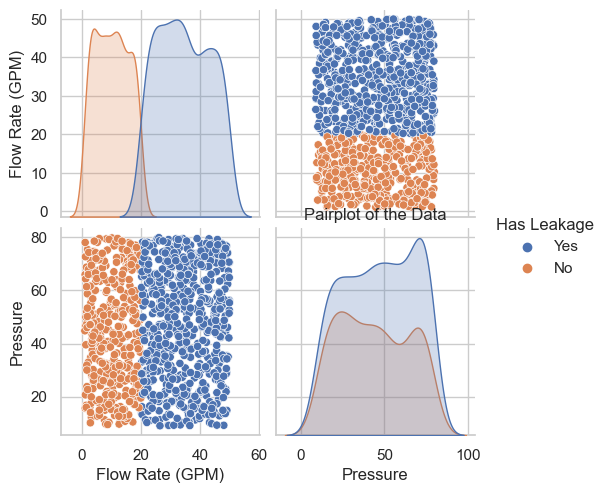

In [35]:
# Display pairplot for EDA with seaborn
sns.pairplot(data, hue='Has Leakage')
plt.title('Pairplot of the Data')
plt.show()



In [36]:
# Split the dataset into features (X) and labels (y)
X = data[['Flow Rate (GPM)', 'Pressure']]
y = data['Has Leakage']

# Convert the labels to numeric values (0 for 'No' and 1 for 'Yes')
y = pd.get_dummies(y, drop_first=True)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the TensorFlow model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Reshape((1, 2), input_shape=(2,)))  # Reshape input to (batch_size, height=1, width=2)

# Add convolutional layers
model.add(tf.keras.layers.Conv1D(64, kernel_size=1, activation='relu'))
model.add(tf.keras.layers.Conv1D(32, kernel_size=1, activation='relu'))
model.add(tf.keras.layers.Conv1D(16, kernel_size=1, activation='relu'))
model.add(tf.keras.layers.Conv1D(8, kernel_size=1, activation='relu'))

# Flatten the output
model.add(tf.keras.layers.Flatten())

# Add the output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)



Epoch 1/10
25/25 [==============================] - 2s 4ms/step - loss: 0.6420 - accuracy: 0.6025
Epoch 2/10
25/25 [==============================] - 0s 5ms/step - loss: 0.4678 - accuracy: 0.8612
Epoch 3/10
25/25 [==============================] - 0s 5ms/step - loss: 0.2681 - accuracy: 0.9700
Epoch 4/10
25/25 [==============================] - 0s 6ms/step - loss: 0.1457 - accuracy: 0.9750
Epoch 5/10
25/25 [==============================] - 0s 6ms/step - loss: 0.0852 - accuracy: 0.9812
Epoch 6/10
25/25 [==============================] - 0s 5ms/step - loss: 0.0610 - accuracy: 0.9762
Epoch 7/10
25/25 [==============================] - 0s 6ms/step - loss: 0.0474 - accuracy: 0.9900
Epoch 8/10
25/25 [==============================] - 0s 5ms/step - loss: 0.0387 - accuracy: 0.9925
Epoch 9/10
25/25 [==============================] - 0s 6ms/step - loss: 0.0322 - accuracy: 0.9937
Epoch 10/10
25/25 [==============================] - 0s 5ms/step - loss: 0.0281 - accuracy: 0.9950


In [37]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_3 (Reshape)         (None, 1, 2)              0         
                                                                 
 conv1d_9 (Conv1D)           (None, 1, 64)             192       
                                                                 
 conv1d_10 (Conv1D)          (None, 1, 32)             2080      
                                                                 
 conv1d_11 (Conv1D)          (None, 1, 16)             528       
                                                                 
 conv1d_12 (Conv1D)          (None, 1, 8)              136       
                                                                 
 flatten_2 (Flatten)         (None, 8)                 0         
                                                                 
 dense_17 (Dense)            (None, 1)                

In [38]:
# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print("Testing Loss:", loss)
print("Testing Accuracy:", accuracy)


7/7 [==============================] - 0s 4ms/step - loss: 0.0210 - accuracy: 0.9950
Testing Loss: 0.020999379456043243
Testing Accuracy: 0.9950000047683716


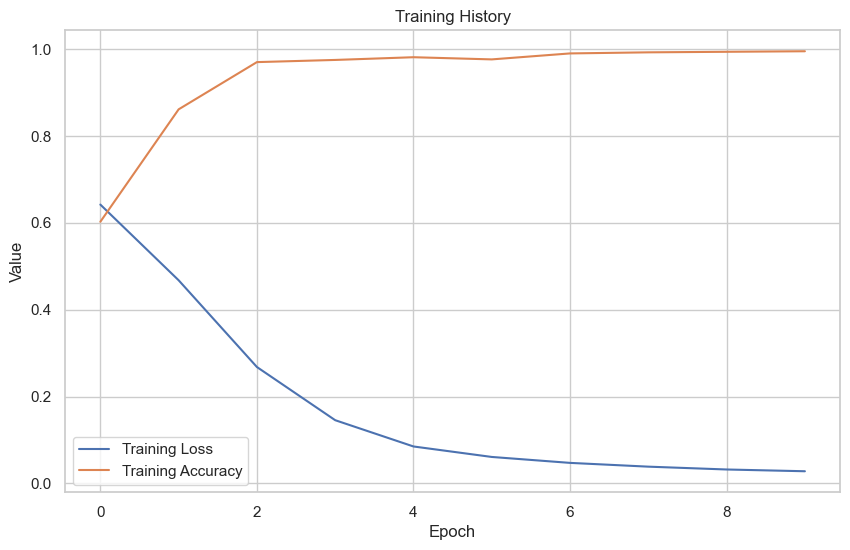

In [39]:

# Plot the training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()



7/7 [==============================] - 0s 3ms/step


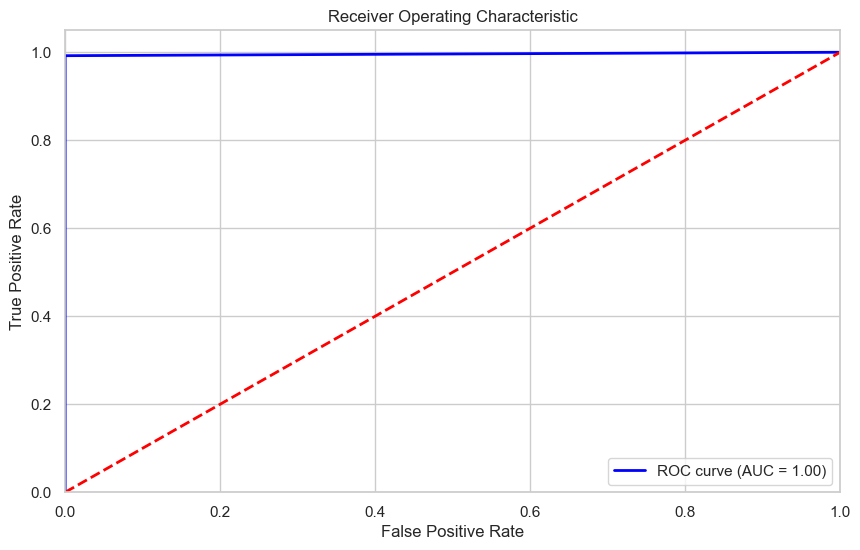

In [40]:
# Make predictions on the testing set
y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.5)

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


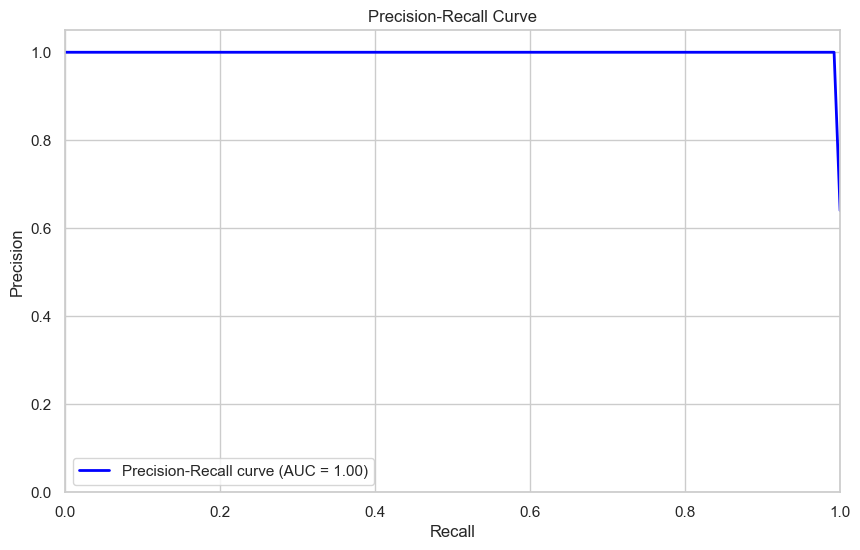

In [41]:

# Generate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()



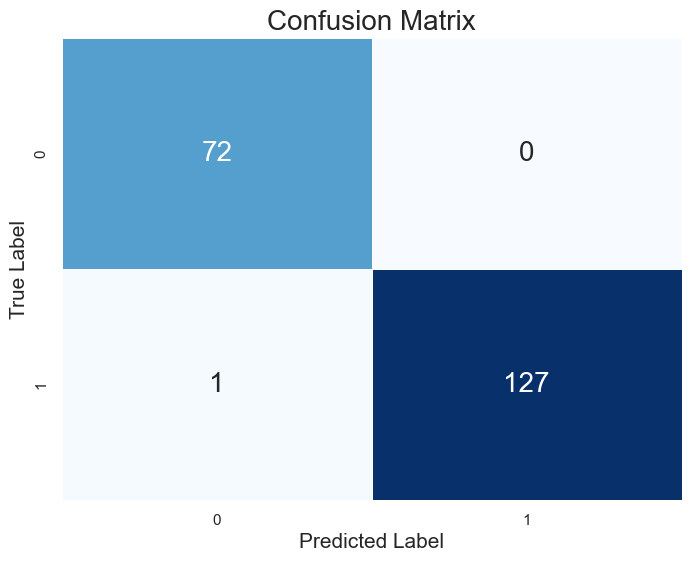

In [42]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', linewidths=.5, cbar=False, annot_kws={"size": 20})
plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted Label', fontsize=15)
plt.ylabel('True Label', fontsize=15)
plt.show()

